# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [9]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)


## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

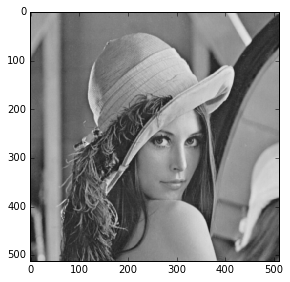

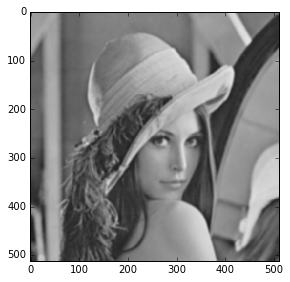

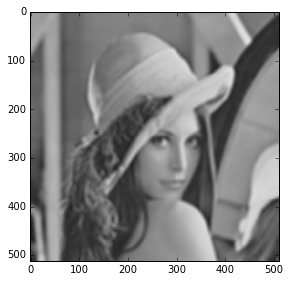

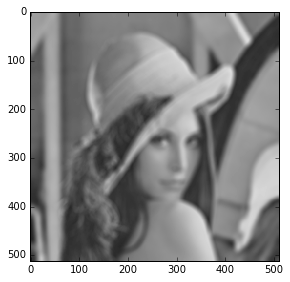

In [17]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean

plt.figure()
Filter_Mean1 = mean(lena_im, disk(1))
io.imshow(Filter_Mean1) 
plt.show()

Filter_Mean2 = mean(lena_im, disk(3))
io.imshow(Filter_Mean2)
plt.show()

Filter_Mean3 = mean(lena_im, disk(5))
io.imshow(Filter_Mean3)
plt.show()

Filter_Mean4 = mean(lena_im, disk(7))
io.imshow(Filter_Mean4)  
plt.show()



### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

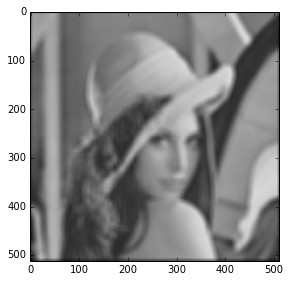

In [21]:

k = (np.ones((14,14)))/(14*14)
from scipy import ndimage
ff = ndimage.convolve(lena_im, k, mode='constant', cval=0.0)
io.imshow(ff)  
plt.show()


Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [31]:
from skimage import filters
from skimage.color import rgb2gray


#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

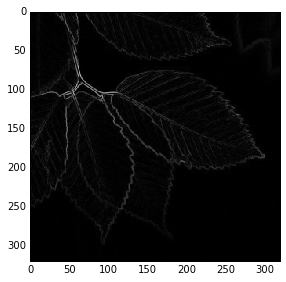

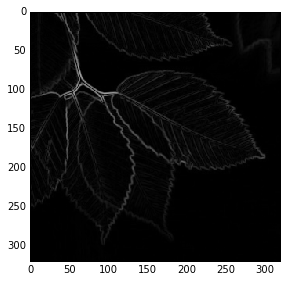

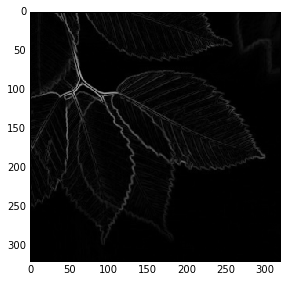

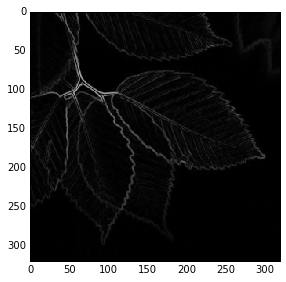

In [33]:
img = io.imread(Path.__add__('leaves.jpg'))
img = rgb2gray(img)

u1=filters.roberts(img)
io.imshow(u1) 
plt.show()

u2=filters.prewitt(img)
io.imshow(u2) 
plt.show()

u3=filters.sobel(img)
io.imshow(u3) 
plt.show()

u4=filters.scharr(img)
io.imshow(u4) 
plt.show()


##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

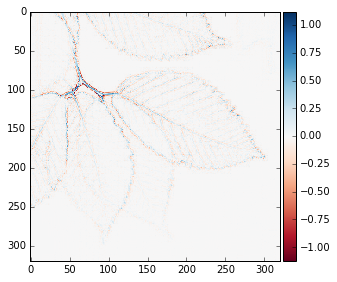

In [35]:


a= ndimage.filters.laplace(img)
io.imshow(a) 
plt.show()


## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [56]:
from skimage import util
from skimage.filters.rank import median
from skimage.filters.rank import mean_percentile

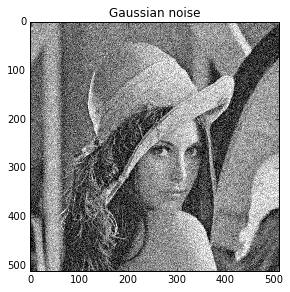

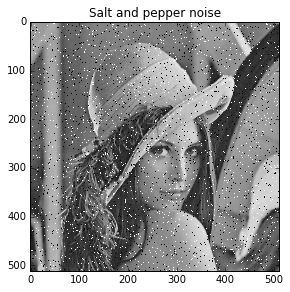

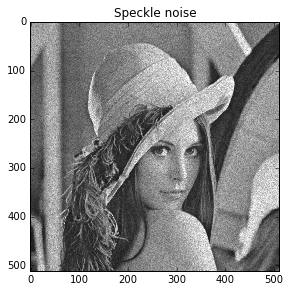

In [39]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

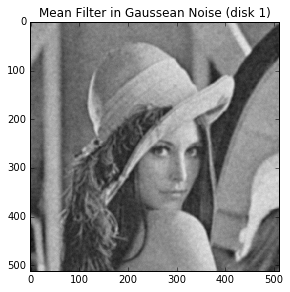

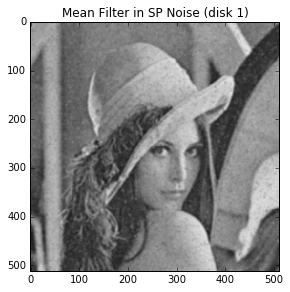

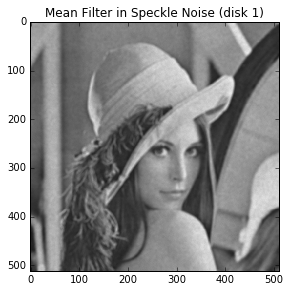

In [51]:
Mean_Gauss = mean(lena_gaussian, disk(3))
io.imshow(Mean_Gauss) 
plt.title('Mean Filter in Gaussean Noise (disk 1)')    
plt.show()

Mean_SP = mean(lena_sp, disk(3))
io.imshow(Mean_SP) 
plt.title('Mean Filter in SP Noise (disk 1)')    
plt.show()

Mean_Spec = mean(lena_speckle, disk(3))
io.imshow(Mean_Spec) 
plt.title('Mean Filter in Speckle Noise (disk 1)')    
plt.show()

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

In [65]:
Med_Gauss = mean_percentile(lena_gaussian , p0=0.05 , p1=0.95)
io.imshow(Med_Gauss) 
plt.title('Median Filter in Gaussean Noise (disk 1)')    
plt.show()

TypeError: mean_percentile() takes at least 2 arguments (3 given)

** median filter: **

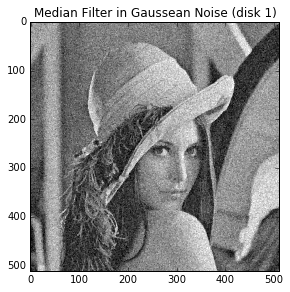

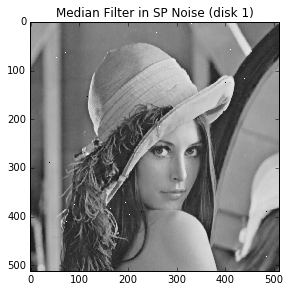

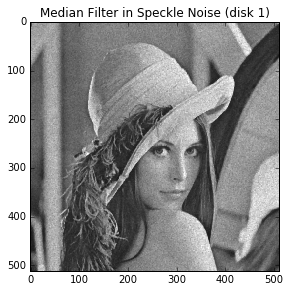

In [50]:

Med_Gauss = median(lena_gaussian, disk(1))
io.imshow(Med_Gauss) 
plt.title('Median Filter in Gaussean Noise (disk 1)')    
plt.show()


Med_SP = median(lena_sp, disk(1))
io.imshow(Med_SP) 
plt.title('Median Filter in SP Noise (disk 1)')    
plt.show()

Med_Spec = median(lena_speckle, disk(1))
io.imshow(Med_Spec) 
plt.title('Median Filter in Speckle Noise (disk 1)')    
plt.show()



## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**